In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import h5py
import copy
import datetime
import ta
from mpl_finance import candlestick_ohlc
# ConvergenceWarning('ignore')
# Do you wanna see?
verbose = True

import sys
sys.path.append('../')

from utils.data_extraction import load_data
from utils.data_cleaning import HFDataCleaning
from utils.generate_features import candleCreateNP_vect_final,\
                                    generateFeatures_final
from utils.preprocessing_features_and_labels import extract_labels,\
                                                    align_features_and_labels,\
                                                    pre_processing_initial,\
                                                    pre_processing_extended,\
                                                    pre_processing

In [2]:
# print(os.listdir())
try:
    path = 'a:/taqhdf5'  #'a:/taqhdf5'
    os.listdir(path)
except:
    path = 't:/taqhdf5'  #'a:/taqhdf5'
    os.listdir(path)    
# allFiles = os.listdir(path)
# print(len(allFiles), allFiles[:5], allFiles[-5:])
# print(allFiles[-10:])

# dates = np.array(['2020040' + str(i) if i < 10 else '202004' + str(i) for i in np.arange(1,32)]).astype(int)
dates = np.array(['20200401']).astype(int)#,'20200402','20200403','20200406','20200407'

# Provide a list of tickers of interest
tickers = ['GOOG']#'MSFT'

# Do we need data on trades, quotes or both?
dataNeeded = 'both' # 'trades', 'quotes' or 'both'

# run load_data()
if dataNeeded == 'trades':
    tradeData = load_data(dates, tickers, dataNeeded, path, verbose)
elif dataNeeded == 'quotes':
    quoteData = load_data(dates, tickers, dataNeeded, path, verbose)
elif dataNeeded == 'both':
    tradeData, quoteData = load_data(dates, tickers, dataNeeded, path, verbose)

['.ipynb_checkpoints', 'Old Versions', 'preprocessing.ipynb', 'Quote_vs_trade_candles.ipynb', 'testing_and_comparing_candlesticks.ipynb', 'testing_features.ipynb', 'testing_preprocessing_features_and_labels.ipynb']
8543 ['taq_19930315.h5', 'taq_19930104.h5', 'taq_19930317.h5', 'taq_19930105.h5', 'taq_19930316.h5'] ['taqtrade_20200619.h5', 'taqtrade_20200624.h5', 'taqtrade_20200629.h5', 'taqquote_20200602.h5', 'taqquote_20200605.h5']
['taqtrade_20200603.h5', 'taqtrade_20200605.h5', 'taqtrade_20200609.h5', 'taqtrade_20200611.h5', 'taqtrade_20200616.h5', 'taqtrade_20200619.h5', 'taqtrade_20200624.h5', 'taqtrade_20200629.h5', 'taqquote_20200602.h5', 'taqquote_20200605.h5']
##### Date range #####

Date, Min: 20200401
Date, Max: 20200401

##### Data Extraction begins #####

Both trade and quote data is being extracted..

### Trade Data ###

The raw H5 trade file contains:  ['TradeIndex', 'Trades'] 

Ticker Information:  (b'GOOG            ', 26900500, 71427) 

Sneak peak of the data

       

In [4]:
tradeData

,utcsec,ex,cond,volume,price,TradeStopStockIndicator,corr,TradeSequenceNumber,TradeID,SourceOfTrade,TradeReportingFacility,ParticipantTime,TRFTime,TTE,Date,Timestamp,TSRemainder,Hour,Minute,Ticker
0,14400048517953,P,@ TI,67,1139.44,,00,1507,1,N,,14400048141056,99,0,20200401,2020-04-01 04:00:00.048517,953,4,0,GOOG
1,14422296771981,P,@ TI,20,1138.55,,00,1552,2,N,,14422296394240,99,0,20200401,2020-04-01 04:00:22.296771,981,4,0,GOOG
2,14429472894282,Q,@FTI,1,1138.54,,00,1554,1,N,,14429472872353,99,1,20200401,2020-04-01 04:00:29.472894,282,4,0,GOOG
3,14506997225243,P,@ TI,31,1143.65,,00,1581,3,N,,14506996848640,99,0,20200401,2020-04-01 04:01:46.997225,243,4,1,GOOG
4,14516526073882,P,@ TI,1,1143.59,,00,1587,4,N,,14516525699840,99,0,20200401,2020-04-01 04:01:56.526073,882,4,1,GOOG
5,14559559011030,Q,@ TI,3,1140.00,,00,1607,2,N,,14559558989712,99,0,20200401,2020-04-01 04:02:39.559011,030,4,2,GOOG
6,14599876695904,Q,@FTI,25,1136.52,,00,1621,3,N,,14599876673317,99,1,20200401,2020-04-01 04:03:19.876695,904,4,3,GOOG
7,14599876699507,Q,@FTI,4,1135.00,,00,1622,4,N,,14599876673317,99,1,20200401,2020-04-01 04:03:19.876699,507,4,3,GOOG
8,14599876704167,Q,@FTI,96,1131.41,,00,1623,5,N,,14599876673317,99,1,20200401,2020-04-01 04:03:19.876704,167,4,3,GOOG
9,14599876722045,Q,@FTI,4,1131.41,,00,1624,6,N,,14599876688151,99,1,20200401,2020-04-01 04:03:19.876722,045,4,3,GOOG


In [5]:
quoteData

,utcsec,ex,bid,bidsize,ofr,ofrsize,mode,Date,Timestamp,TSRemainder,Hour,Minute,Ticker,price,spread
0,14400049177409,P,963.00,1,0.00,0,R,20200401,2020-04-01 04:00:00.049177,409,4,0,GOOG,481.500,-963.00
1,14400049177610,P,985.65,1,0.00,0,R,20200401,2020-04-01 04:00:00.049177,610,4,0,GOOG,492.825,-985.65
2,14400049181518,P,999.00,1,0.00,0,R,20200401,2020-04-01 04:00:00.049181,518,4,0,GOOG,499.500,-999.00
3,14400049181691,P,1018.00,1,0.00,0,R,20200401,2020-04-01 04:00:00.049181,691,4,0,GOOG,509.000,-1018.00
4,14400049274621,P,1018.00,1,1188.88,3,R,20200401,2020-04-01 04:00:00.049274,621,4,0,GOOG,1103.440,170.88
5,14400049539719,P,1056.32,1,1188.88,3,R,20200401,2020-04-01 04:00:00.049539,719,4,0,GOOG,1122.600,132.56
6,14400049632755,P,1060.00,1,1188.88,3,R,20200401,2020-04-01 04:00:00.049632,755,4,0,GOOG,1124.440,128.88
7,14400049757133,P,1090.00,1,1188.88,3,R,20200401,2020-04-01 04:00:00.049757,133,4,0,GOOG,1139.440,98.88
8,14400050913562,P,1095.01,1,1188.88,3,R,20200401,2020-04-01 04:00:00.050913,562,4,0,GOOG,1141.945,93.87
9,14400051050035,P,1095.01,1,1180.00,1,R,20200401,2020-04-01 04:00:00.051050,035,4,0,GOOG,1137.505,84.99


# Clean datasets

In [3]:
########### Clean tradeData ###########
    
DATA_SAMPLE = 'full' # or 'stable'

if DATA_SAMPLE == 'stable':
    # P1 is used for keeping data within [9.5, 16]
    cleaned_tradeData = HFDataCleaning(['P1_2','p2','t1','p3'],tradeData,'trade',['q'])
elif DATA_SAMPLE == 'full':
    # P1_2 is used for keeping data within [9, 16.5]
    cleaned_tradeData = HFDataCleaning(['P1_2','p2','t1','p3'],tradeData,'trade',['q'])#'t1',tradeData
    
    
########### Clean quoteData ###########
    
DATA_SAMPLE = 'full' # or 'stable'

if DATA_SAMPLE == 'stable':
    # P1 is used for keeping data within [9.5, 16]
    cleaned_quoteData = HFDataCleaning(['P1_2','p2', 'q2', 'p3'],quoteData,'quote',['q'])
elif DATA_SAMPLE == 'full':
    # P1_2 is used for keeping data within [9, 16.5]
    cleaned_quoteData = HFDataCleaning(['P1_2','p2', 'q2', 'p3'],quoteData,'quote',['q'])#'t1',tradeData
        

In [4]:
cleaned_tradeData.head(10)

,utcsec,ex,cond,volume,price,TradeStopStockIndicator,corr,TradeSequenceNumber,TradeID,SourceOfTrade,TradeReportingFacility,ParticipantTime,TRFTime,TTE,Date,Timestamp,TSRemainder,Hour,Minute,Ticker
0,32485885409069,Q,@ TI,30,1124.62,,00,26476,293,N,,32485885387917,99,0,20200401,2020-04-01 09:01:25.885409,069,9,1,GOOG
1,32486612971716,Q,@ TI,30,1124.51,,00,26492,294,N,,32486612950358,99,0,20200401,2020-04-01 09:01:26.612971,716,9,1,GOOG
2,32519261072977,Q,@ TI,1,1125.74,,00,26668,295,N,,32519261050258,99,0,20200401,2020-04-01 09:01:59.261072,977,9,1,GOOG
3,32525016359664,Q,@ TI,2,1125.74,,00,26710,296,N,,32525016338305,99,0,20200401,2020-04-01 09:02:05.016359,664,9,2,GOOG
4,32611276175419,Q,@ TI,27,1125.22,,00,27229,297,N,,32611276152332,99,0,20200401,2020-04-01 09:03:31.276175,419,9,3,GOOG
5,32611276179601,Q,@ TI,2,1125.40,,00,27230,298,N,,32611276152332,99,0,20200401,2020-04-01 09:03:31.276179,601,9,3,GOOG
6,32611276183113,Q,@ TI,1,1125.40,,00,27231,299,N,,32611276152332,99,0,20200401,2020-04-01 09:03:31.276183,113,9,3,GOOG
7,32611276188123,Q,@ TI,1,1126.15,,00,27232,300,N,,32611276152332,99,0,20200401,2020-04-01 09:03:31.276188,123,9,3,GOOG
8,32611276191620,Q,@ TI,19,1126.94,,00,27233,301,N,,32611276152332,99,0,20200401,2020-04-01 09:03:31.276191,620,9,3,GOOG
9,32805356294187,Q,@FTI,1,1126.62,,00,28342,302,N,,32805356273307,99,1,20200401,2020-04-01 09:06:45.356294,187,9,6,GOOG


In [5]:
cleaned_quoteData.head(10)

,utcsec,ex,bid,bidsize,ofr,ofrsize,mode,Date,Timestamp,TSRemainder,Hour,Minute,Ticker,price,spread
0,32410811640306,Q,1124.0,7,1134.47,1,R,20200401,2020-04-01 09:00:10.811640,306,9,0,GOOG,1129.235,10.47
1,32410812050553,Q,1124.0,8,1134.47,1,R,20200401,2020-04-01 09:00:10.812050,553,9,0,GOOG,1129.235,10.47
2,32415823014688,Q,1124.0,7,1134.47,1,R,20200401,2020-04-01 09:00:15.823014,688,9,0,GOOG,1129.235,10.47
3,32415823420468,Q,1124.0,8,1134.47,1,R,20200401,2020-04-01 09:00:15.823420,468,9,0,GOOG,1129.235,10.47
4,32416811706275,Q,1124.0,7,1134.47,1,R,20200401,2020-04-01 09:00:16.811706,275,9,0,GOOG,1129.235,10.47
5,32432380491088,Q,1124.0,8,1134.47,1,R,20200401,2020-04-01 09:00:32.380491,088,9,0,GOOG,1129.235,10.47
6,32432410489767,Q,1124.0,7,1134.47,1,R,20200401,2020-04-01 09:00:32.410489,767,9,0,GOOG,1129.235,10.47
7,32443664221028,Q,1124.0,7,1139.90,1,R,20200401,2020-04-01 09:00:43.664221,028,9,0,GOOG,1131.950,15.90
8,32443669281068,Q,1124.0,7,1134.49,1,R,20200401,2020-04-01 09:00:43.669281,068,9,0,GOOG,1129.245,10.49
9,32450960939439,Q,1124.0,7,1139.90,1,R,20200401,2020-04-01 09:00:50.960939,439,9,0,GOOG,1131.950,15.90


# Construct candles

In [6]:
########### Construct Candles ################
# candles = candleCreateNP_vect_final(cleanedData
#                          ,1)

candles_trade = candleCreateNP_vect_final(data = cleaned_tradeData,
                                       step = 1,
                                        verbose=False,
                                        fillHoles=True,
                                        sample='full',
                                        numpied=False)

candles_quote = candleCreateNP_vect_final(data = cleaned_quoteData,
                                       step = 1,
                                        verbose=False,
                                        fillHoles=True,
                                        sample='full',
                                        numpied=False)

In [7]:
print(candles_trade.shape[0])
candles_trade.head(10)

450


price                           
                        open     high      low    close
Date     time_group                                    
20200401 0               NaN      NaN      NaN      NaN
         1           1124.62  1125.74  1124.51  1125.74
         2           1125.74  1125.74  1125.74  1125.74
         3           1125.22  1126.94  1125.22  1126.94
         4           1126.94  1126.94  1126.94  1126.94
         5           1126.94  1126.94  1126.94  1126.94
         6           1126.62  1126.62  1126.62  1126.62
         7           1126.80  1126.80  1126.80  1126.80
         8           1126.80  1126.80  1126.80  1126.80
         9           1127.00  1127.00  1125.41  1125.41

In [8]:
print(candles_quote.shape[0])
candles_quote.head(10)

450


price                              
                         open      high       low     close
Date     time_group                                        
20200401 0           1129.235  1131.950  1129.160  1131.950
         1           1128.540  1131.950  1127.185  1131.650
         2           1127.545  1131.650  1127.545  1131.650
         3           1128.580  1131.650  1128.000  1128.745
         4           1128.745  1128.745  1128.745  1128.745
         5           1128.745  1128.745  1128.745  1128.745
         6           1128.745  1128.745  1127.505  1128.745
         7           1128.745  1131.650  1128.065  1129.460
         8           1131.650  1131.775  1128.205  1131.650
         9           1131.775  1131.775  1129.000  1131.650

# Adjust candle function to return spread
- At least for now (should be sufficient though), we will only return spread at open and at close (spreads at high/low are tricky, and we shouldn't use them as entry prices anyway)

In [9]:
            
# Final vectorized function (currently v5)
def candleCreateNP_vect_final_v2(data
                        ,step
                        ,verbose=False
                        ,fillHoles=True
                        ,sample='stable'
                        ,numpied=True
                        ,return_spreads=False):

    # v1-v4:
    #data['hour_min_col'] = data['Hour'] + data['Minute']/60
    
    # v5:
    # generate hour_min_col to hold floated Timestamp for time binning into candles
    Timestamp_dt = data['Timestamp'].dt
    Timestamp_float = Timestamp_dt.hour \
                      + Timestamp_dt.minute/60 \
                      + Timestamp_dt.second/(60*60) \
                      + Timestamp_dt.microsecond/(60*60*10**6)
    data['hour_min_col'] = Timestamp_float    
              
    if verbose:
        print(f"min and max of new hour_min_col: \
              {data['hour_min_col'].min()}, {data['hour_min_col'].max()}")

    # setup time_bins to group each timestamp
    delta = step/60
              
    if sample == 'full':
        time_bins = np.arange(9, 16.5+delta, delta)
    else:
        time_bins = np.arange(9.5, 16+delta, delta)

    # put each timestamp into a bucket according to time_bins defined by the step variable
    data['time_group'] = pd.cut(data['hour_min_col'], bins=time_bins, right=True, labels=False)

    # group by date and time_group, extract price, take it open, max, min, last (open, high, low, close)
    OHLC = data.groupby(['Date','time_group'])[['price']].agg(['first', 'max', 'min', 'last'])
    OHLC = OHLC.rename(columns={'first':'open'
                                ,'max':'high'
                                ,'min':'low'
                                ,'last':'close'})
              
    if return_spreads:
        assert 'spread' in data.columns, 'The input data is not quotes data which it must be for return_spread == True'
        spreads = data.groupby(['Date','time_group'])[['spread']].agg(['first', 'last'])
        spreads = spreads.rename(columns={'first':'open',
                                          'last':'close'})    
        OHLC = pd.concat([OHLC, spreads], axis=1)
              
    ###Let check if we are missing any values       
    # number of days
    dayz = len(OHLC.index.get_level_values(0).unique())
              
    # if 
    if len(OHLC.index.get_level_values(1))!=((len(time_bins)-1)*dayz):

        ##### Creating our temporary table, with all the indices that is surposed to be in the actual candle-table.
        ## Creating the multiIndex-index
        mtInd = pd.MultiIndex.from_product([OHLC.index.get_level_values(0).unique(), np.arange(len(time_bins)-1)],
                                   names=['Date','time_group'])

        ## Creating the multiIndex-columns
        if not return_spreads:
            mtCol = pd.MultiIndex.from_product([['price'], ['open','high','low','close']])
        else:
            mtCol = pd.MultiIndex.from_tuples([('price', 'open'),
                                               ('price', 'high'),
                                               ('price', 'low'),
                                               ('price', 'close'),
                                               ('spread', 'open'),
                                               ('spread', 'close')])
        
        ## Creating the table itself
        tempDf = pd.DataFrame(np.nan
                              ,columns=mtCol
                              ,index=mtInd)

        # Filling the non-empty elements of OHLC into the temp-table
        tempDf.loc[OHLC.index]=OHLC.copy(deep=True)

        # To see that the filling mechanism works:
        if fillHoles:

            if not return_spreads:
                # Storing the indices to be filled
                toBeFilled = tempDf[tempDf.price['close'].isna()].index

                # Fill out the empty ones!
                dataToFillIn = tempDf.price['close'].fillna(method='ffill').loc[toBeFilled]
                tempDf.loc[toBeFilled] = pd.DataFrame({('price','open'): dataToFillIn,
                                                      ('price','high'): dataToFillIn,
                                                      ('price','low'): dataToFillIn,
                                                      ('price','close'): dataToFillIn})

            else:
                # Storing the indices to be filled
                toBeFilled_price = tempDf[tempDf.price['close'].isna()].index 
                toBeFilled_spread = tempDf[tempDf.spread['close'].isna()].index 
              
                # Fill out the empty ones!
                dataToFillIn_price = tempDf.price['close'].fillna(method='ffill').loc[toBeFilled_price]
                dataToFillIn_spread = tempDf.spread['close'].fillna(method='ffill').loc[toBeFilled_spread]
              
                tempDf.loc[toBeFilled_price, ('price')] = pd.DataFrame({('price','open'): dataToFillIn_price,
                                                                          ('price','high'): dataToFillIn_price,
                                                                          ('price','low'): dataToFillIn_price,
                                                                          ('price','close'): dataToFillIn_price,                                                      
                                                                          })  
              
                tempDf.loc[toBeFilled_spread, ('spread')] = pd.DataFrame({('spread','open'): dataToFillIn_spread,
                                                                          ('spread','close'): dataToFillIn_spread,  
                                                                           }) 

        # Return the complete data
        if numpied:
            return tempDf.values
        else:
            return tempDf

    else:
              
        # return as numpy if preferred      
        if numpied:
            return OHLC.values
        else:
            return OHLC

In [10]:
candles_trade_test = candleCreateNP_vect_final_v2(data = cleaned_tradeData,
                                        step = 1,
                                        verbose=False,
                                        fillHoles=True,
                                        sample='full',
                                        numpied=False,
                                        return_spreads=False)

candles_quote_test = candleCreateNP_vect_final_v2(data = cleaned_quoteData,
                                                   step = 1,
                                                    verbose=False,
                                                    fillHoles=True,
                                                    sample='full',
                                                    numpied=False,
                                                    return_spreads=True)

In [11]:
candles_trade_test

price                           
                        open     high      low    close
Date     time_group                                    
20200401 0               NaN      NaN      NaN      NaN
         1           1124.62  1125.74  1124.51  1125.74
         2           1125.74  1125.74  1125.74  1125.74
         3           1125.22  1126.94  1125.22  1126.94
         4           1126.94  1126.94  1126.94  1126.94
...                      ...      ...      ...      ...
         445         1102.59  1102.59  1102.59  1102.59
         446         1102.59  1102.59  1102.59  1102.59
         447         1102.59  1102.59  1102.59  1102.59
         448         1102.59  1102.59  1102.59  1102.59
         449         1102.59  1102.59  1102.59  1102.59

[450 rows x 4 columns]

In [12]:
candles_quote_test

price                               spread       
                         open      high       low     close   open  close
Date     time_group                                                      
20200401 0           1129.235  1131.950  1129.160  1131.950  10.47  15.90
         1           1128.540  1131.950  1127.185  1131.650   9.08  15.30
         2           1127.545  1131.650  1127.545  1131.650   7.09  15.30
         3           1128.580  1131.650  1128.000  1128.745   9.16   9.49
         4           1128.745  1128.745  1128.745  1128.745   9.49   9.49
...                       ...       ...       ...       ...    ...    ...
         445         1105.750  1105.750  1105.750  1105.750  16.50  16.50
         446         1105.750  1105.750  1105.750  1105.750  16.50  16.50
         447         1105.750  1105.750  1105.750  1105.750  16.50  16.50
         448         1105.750  1105.750  1105.750  1105.750  16.50  16.50
         449         1105.750  1105.750  1105.750  1105.750  16.50  16.50

[450 rows x 6 columns]

In [13]:
# spread at index 420 (means a few millisec after 16:00) seems high, check it out
cleaned_quoteData[(cleaned_quoteData['hour_min_col'] > 16) & (cleaned_quoteData['hour_min_col'] < 16.002)]

,utcsec,ex,bid,bidsize,ofr,ofrsize,mode,Date,Timestamp,TSRemainder,Hour,Minute,Ticker,price,spread,hour_min_col,time_group
234285,57600037491694,Q,1105.38,16,1105.62,5,R,20200401,2020-04-01 16:00:00.037491,694,16,0,GOOG,1105.500,0.24,16.000010,420
234286,57600573843208,Q,1105.38,16,1105.62,1,R,20200401,2020-04-01 16:00:00.573843,208,16,0,GOOG,1105.500,0.24,16.000159,420
234287,57600573844595,Q,1105.38,16,1106.00,4,R,20200401,2020-04-01 16:00:00.573844,595,16,0,GOOG,1105.690,0.62,16.000159,420
234288,57600599331290,Q,1105.27,17,1106.00,4,R,20200401,2020-04-01 16:00:00.599331,290,16,0,GOOG,1105.635,0.73,16.000166,420
234289,57600599333357,Q,1105.27,17,1106.01,3,R,20200401,2020-04-01 16:00:00.599333,357,16,0,GOOG,1105.640,0.74,16.000166,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234363,57604434122839,Q,1101.44,1,1115.98,1,R,20200401,2020-04-01 16:00:04.434122,839,16,0,GOOG,1108.710,14.54,16.001232,420
234364,57604450708194,Q,1101.44,1,1116.67,1,R,20200401,2020-04-01 16:00:04.450708,194,16,0,GOOG,1109.055,15.23,16.001236,420
234365,57604459562113,Q,1101.45,1,1116.67,1,R,20200401,2020-04-01 16:00:04.459562,113,16,0,GOOG,1109.060,15.22,16.001239,420
234366,57605532644443,Q,1102.87,1,1116.67,1,R,20200401,2020-04-01 16:00:05.532644,443,16,0,GOOG,1109.770,13.80,16.001537,420


In [14]:
candles_quote_test.loc[:, [('price', 'open'),
                           ('price', 'high'),
                           ('price', 'low'),
                           ('price', 'close'),
                           ('spread', 'open'),
                           ('spread', 'close'),
                          ]].head(5)

price                               spread       
                         open      high       low     close   open  close
Date     time_group                                                      
20200401 0           1129.235  1131.950  1129.160  1131.950  10.47  15.90
         1           1128.540  1131.950  1127.185  1131.650   9.08  15.30
         2           1127.545  1131.650  1127.545  1131.650   7.09  15.30
         3           1128.580  1131.650  1128.000  1128.745   9.16   9.49
         4           1128.745  1128.745  1128.745  1128.745   9.49   9.49

# Plot candlesticks and compare

In [15]:
def graph_data(data=None, figsize=(32,16), xlim='', ylim=''):

    fig = plt.figure(figsize=figsize) #(32/2,16/2))
    ax1 = plt.subplot2grid((1,1), (0,0))

    date, closep, highp, lowp, openp, adj_closep, volume = data[['snapshotTime', 
                                                              'closeMid', 
                                                              'highMid', 
                                                              'lowMid', 
                                                              'openMid',
                                                              'closeMid',
                                                              'lastTradedVolume']].T.to_numpy()

    date = data.index
    
    x = 0 #start_idx 
    y = data.shape[0] #end_idx    
    ohlc = []
    #date[0]

    while x < y:
        try:
            append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x] #append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        except:
            print(x,y, openp[x], closep[x])
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.6, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    #ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    #ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)

    if xlim:
        ax1.set_xlim(xlim)
    if ylim:
        ax1.set_ylim(ylim)
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('FTSE')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)

    return fig,ax1



In [16]:
candles_quote_test.shape

(450, 6)

In [17]:
pd.Series(candles_quote_test[('price'), ('close')].values)

0      1131.950
1      1131.650
2      1131.650
3      1128.745
4      1128.745
         ...   
445    1105.750
446    1105.750
447    1105.750
448    1105.750
449    1105.750
Length: 450, dtype: float64

In [22]:
# OHLC plot

# prepare trade data for plot 
plot_data_trade = pd.concat([pd.Series(np.arange(candles_trade_test.shape[0])),
                       pd.Series(candles_trade_test[('price'), ('close')].values),
                       pd.Series(candles_trade_test[('price'), ('high')].values),
                       pd.Series(candles_trade_test[('price'), ('low')].values),
                       pd.Series(candles_trade_test[('price'), ('open')].values),
                       pd.Series(candles_trade_test[('price'), ('close')].values),
                      pd.Series(np.zeros(candles_trade_test.shape[0]))
                      ], axis=1)

plot_data_trade = plot_data_trade.rename(columns={0:'snapshotTime',
                                      1:'closeMid',
                                      2:'highMid', 
                                      3:'lowMid', 
                                      4:'openMid',
                                      5:'closeMid2',
                                      6:'lastTradedVolume',
                                     })   

# prepare quote data for plot
plot_data_quote = pd.concat([pd.Series(np.arange(candles_quote_test.shape[0])),
                       pd.Series(candles_quote_test[('price'), ('close')].values),
                       pd.Series(candles_quote_test[('price'), ('high')].values),
                       pd.Series(candles_quote_test[('price'), ('low')].values),
                       pd.Series(candles_quote_test[('price'), ('open')].values),
                       pd.Series(candles_quote_test[('price'), ('close')].values),
                      pd.Series(np.zeros(candles_quote_test.shape[0]))
                      ], axis=1)

plot_data_quote = plot_data_quote.rename(columns={0:'snapshotTime',
                                      1:'closeMid',
                                      2:'highMid', 
                                      3:'lowMid', 
                                      4:'openMid',
                                      5:'closeMid2',
                                      6:'lastTradedVolume',
                                     })   

No handles with labels found to put in legend.


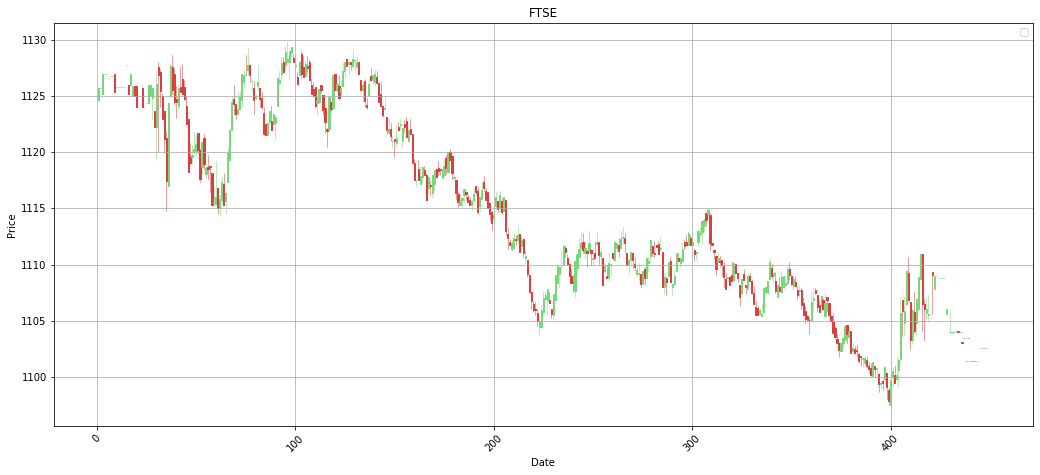

In [23]:
fig, ax = graph_data(data = plot_data_trade, figsize=(16,8))

No handles with labels found to put in legend.


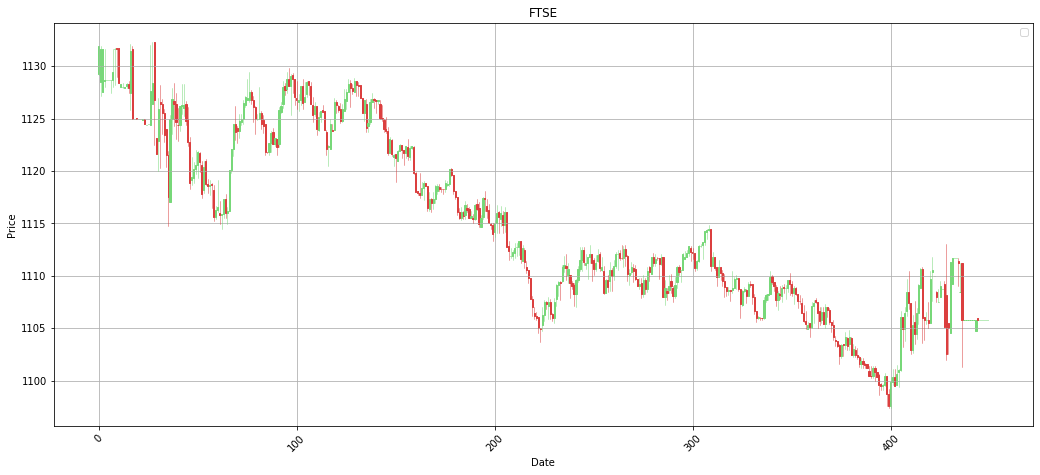

In [24]:
fig, ax = graph_data(data = plot_data_quote, figsize=(16,8))